In [1]:
from autots import AutoTS, load_daily

df = load_daily(long=False)  # long or non-numeric data won't work with this function

Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SeasonalNaive in generation 0 of 10
Model Numb

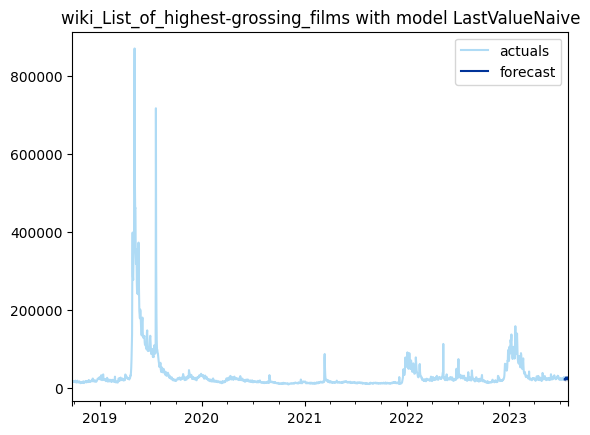

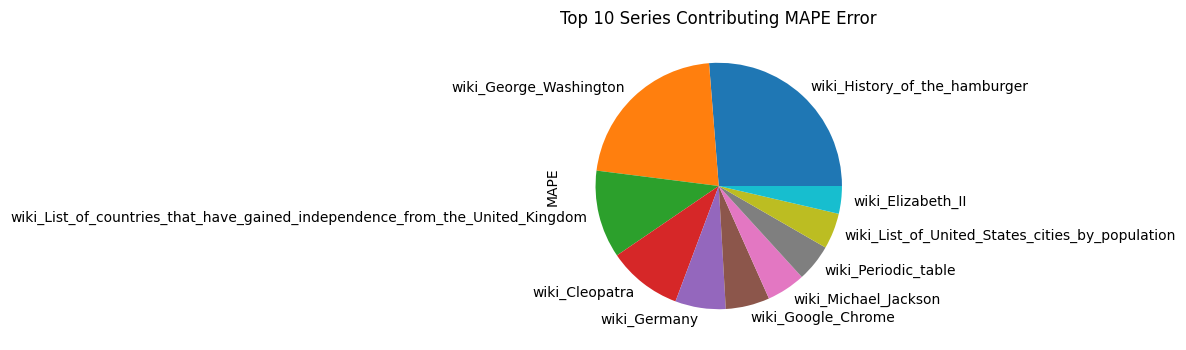

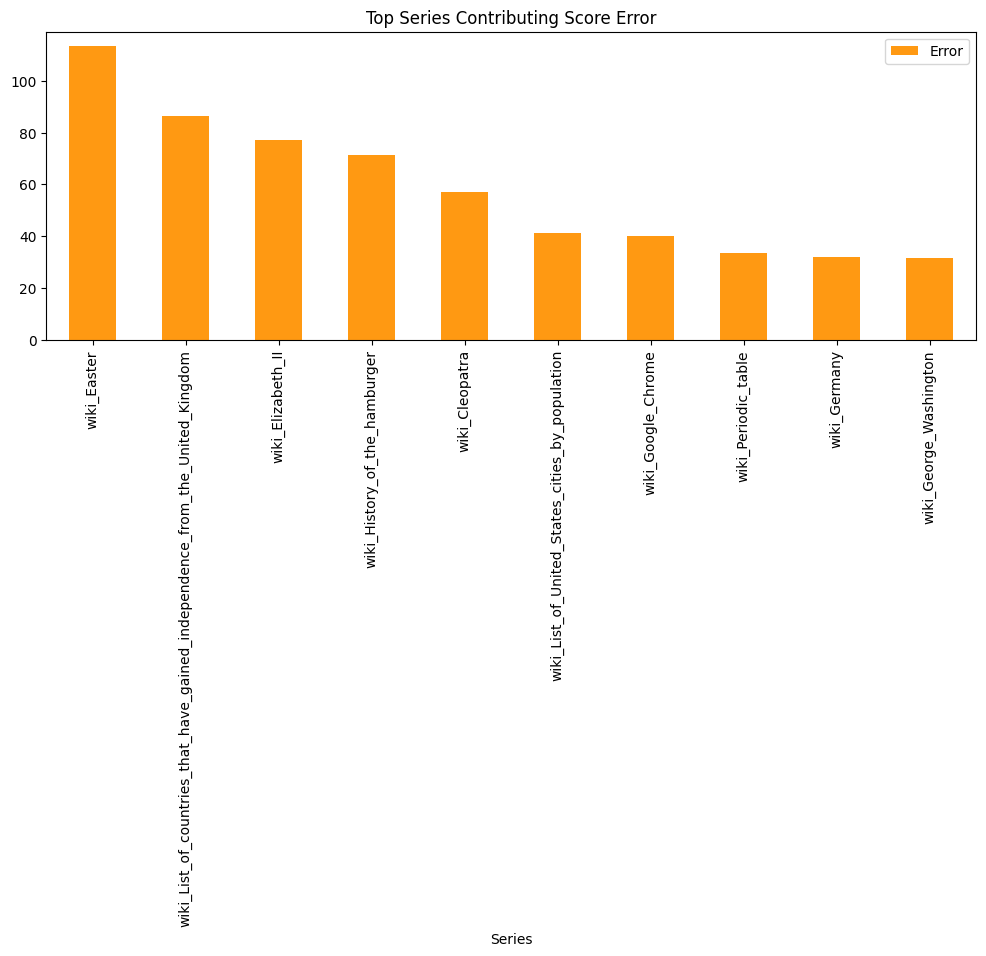

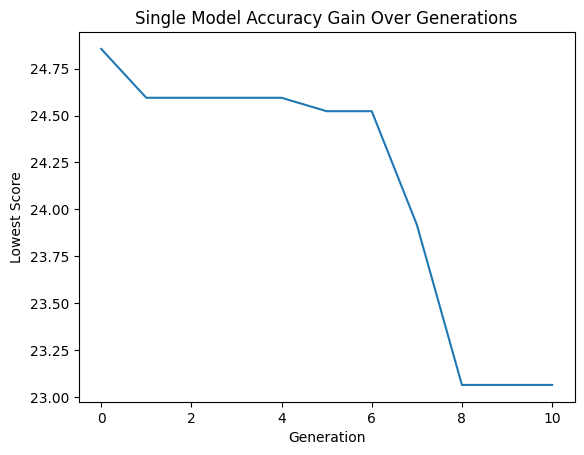

In [2]:
import matplotlib.pyplot as plt

model = AutoTS(model_list="superfast", transformer_list="superfast").fit(df)
prediction = model.predict()

prediction.plot(
    model.df_wide_numeric,
    series=model.df_wide_numeric.columns[2],
    remove_zeroes=False,
    start_date="2018-09-26",
)
plt.show()

model.plot_per_series_mape(kind="pie")
plt.show()

model.plot_per_series_error()
plt.show()

model.plot_generation_loss()
plt.show()

if model.best_model_ensemble == 2:
    model.plot_horizontal_per_generation()
    plt.show()
    model.plot_horizontal_transformers(method="fillna")
    plt.show()
    model.plot_horizontal_transformers()
    plt.show()
    model.plot_horizontal()
    plt.show()
    if "mosaic" in model.best_model["ModelParameters"].iloc[0].lower():
        mosaic_df = model.mosaic_to_df()
        print(mosaic_df[mosaic_df.columns[0:5]].head(5))

if False:  # slow
    model.plot_backforecast(n_splits="auto", start_date="2019-01-01")